In [1]:
import sys
import os
import os.path as op

import xarray as xr
import plotly.express as px
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting import plot_base_map, plot_bar_probs
from ind_setup.plotting_int import plot_timeseries_interactive


In [2]:

lon_site, lat_site = 134.368203, 7.322074

#Area of interest
lon_range  = [129.4088, 137.0541]
lat_range = [1.5214, 11.6587]

In [3]:
shp_f = op.join(os.getcwd(), '..', '..','..', 'data/Palau_EEZ/pw_eez_pol_april2022.shp')
shp_eez = gpd.read_file(shp_f)

In [4]:
path_data = "../../../data"
path_figs = "../../../matrix_cc/figures"
data = xr.load_dataset(op.join(path_data, 'sst_daily_1981_2024_palau.nc'))

In [5]:
dataset_id = 'sst'

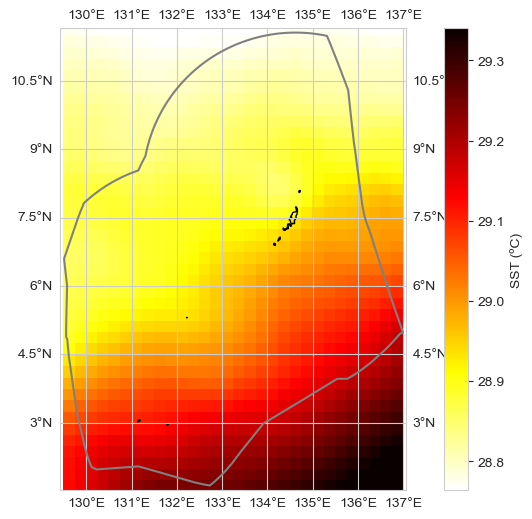

In [6]:
ax = plot_base_map(shp_eez = shp_eez, figsize = [10, 6])
im = ax.pcolor(data.lon, data.lat, data.mean(dim='time')[dataset_id], transform=ccrs.PlateCarree(), 
                cmap = 'hot_r', vmin = np.percentile(data.mean(dim = 'time')[dataset_id], 1), 
                vmax = np.percentile(data.mean(dim = 'time')[dataset_id], 99))
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, label='SST (ºC)')

plt.savefig(op.join(path_figs, 'F12_SST_map.png'), dpi=300, bbox_inches='tight')


In [7]:
data_mean = data.mean(dim = ['lon', 'lat']).to_dataframe()
datag = data_mean.groupby(data_mean.index.year).max()
datag.index = pd.to_datetime(datag.index, format = '%Y')
datag['sst_ref'] = datag['sst'] - datag.loc['1961':'1990'].sst.mean()

In [8]:
# dict_plot = [{'data' : datag, 'var' : 'sst_ref', 'ax' : 1, 'label':f'Annual Maxima'},]
# fig, ax = plot_bar_probs(x = datag.index.year, y = datag.sst_ref.values, trendline=True, figsize = (15, 4),
#                 y_label = 'SST [ºC]')
# ax.set_title('Annual Mean SST anomalies (Over and above 1961 - 1990 reference period)', fontsize=15);
# # ax.set_ylim([29, None])

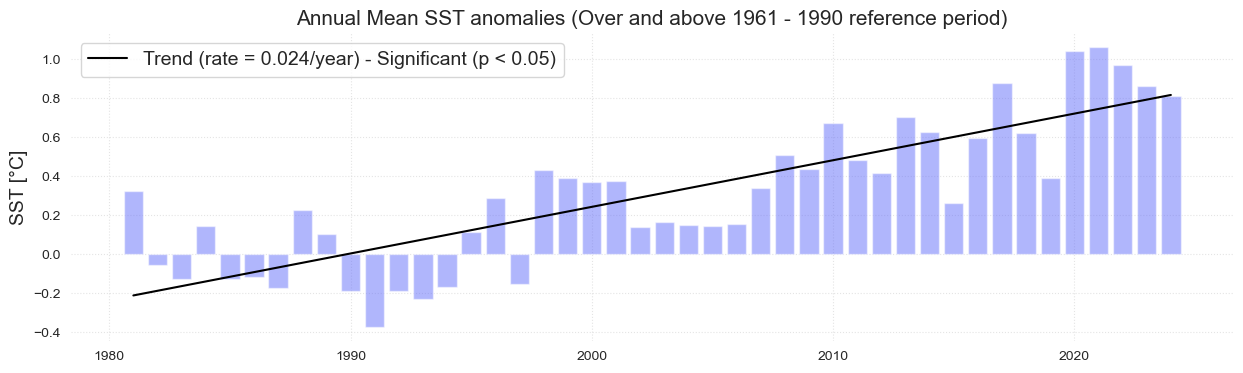

In [9]:
data_mean = data.mean(dim = ['lon', 'lat']).to_dataframe()
data_mean = data_mean.resample('YE').mean()
data_mean['sst_ref'] = data_mean['sst'] - data_mean.loc['1961':'1990'].sst.mean()
fig, ax, trend = plot_bar_probs(x=data_mean.index.year, y=data_mean.sst_ref, trendline=True,
                                y_label='SST [°C]', figsize=[15, 4], return_trend=True)
ax.set_title('Annual Mean SST anomalies (Over and above 1961 - 1990 reference period)', fontsize=15);
plt.savefig(op.join(path_figs, 'F12_SST_trends_Annomalies.png'), dpi=300, bbox_inches='tight')
